In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("UsedCarsSA_Unclean_EN.csv")

In [ ]:
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


#Preprocessing.


In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent.round(2)
})
print(missing_summary)

             Missing Values  Percent Missing
Link                      0             0.00
Make                      0             0.00
Type                      0             0.00
Year                      0             0.00
Origin                   95             1.15
Color                     0             0.00
Options                 109             1.32
Engine_Size            2266            27.47
Fuel_Type                 0             0.00
Gear_Type                74             0.90
Condition                 0             0.00
Mileage                   0             0.00
Region                    0             0.00
Price                     0             0.00
Negotiable                0             0.00


In [ ]:
print(df['Price'].unique()[:10])

# Check datatype of all columns
print(df.dtypes)


['114000' 'Negotiable' '27500' '43000' '59500' '72000' '92000' '80000'
 '32000' '50000']
Link            object
Make            object
Type            object
Year             int64
Origin          object
Color           object
Options         object
Engine_Size    float64
Fuel_Type       object
Gear_Type       object
Condition       object
Mileage          int64
Region          object
Price           object
Negotiable        bool
dtype: object


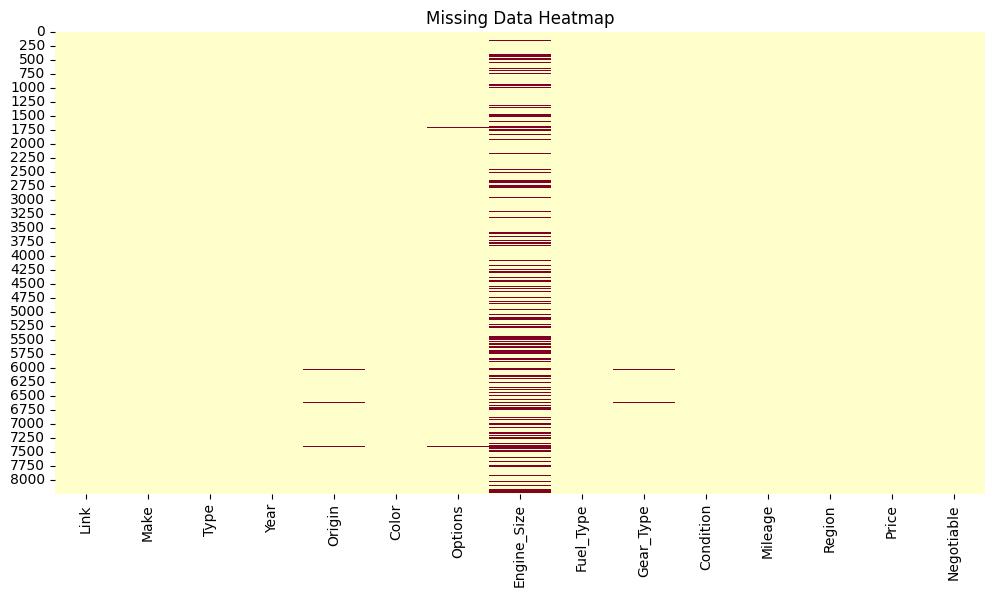

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
df.drop(columns=['Link'], inplace=True)
df = df[df['Price'] != 'Negotiable']
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Price'], inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)


<ipython-input-10-99ab1fadd728>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
<ipython-input-10-99ab1fadd728>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Price'], inplace=True)
<ipython-input-10-99ab1fadd728>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
data_state = {
    "Shape": df.shape,
    "Missing Values Summary": df.isnull().sum(),
    "Data Types": df.dtypes
}
data_state

{'Shape': (5594, 14),
 'Missing Values Summary': Make              0
 Type              0
 Year              0
 Origin           27
 Color             0
 Options          41
 Engine_Size    1216
 Fuel_Type         0
 Gear_Type        19
 Condition         0
 Mileage           0
 Region            0
 Price             0
 Negotiable        0
 dtype: int64,
 'Data Types': Make            object
 Type            object
 Year             int64
 Origin          object
 Color           object
 Options         object
 Engine_Size    float64
 Fuel_Type       object
 Gear_Type       object
 Condition       object
 Mileage          int64
 Region          object
 Price            int64
 Negotiable        bool
 dtype: object}

# Exploratory Data Analysis

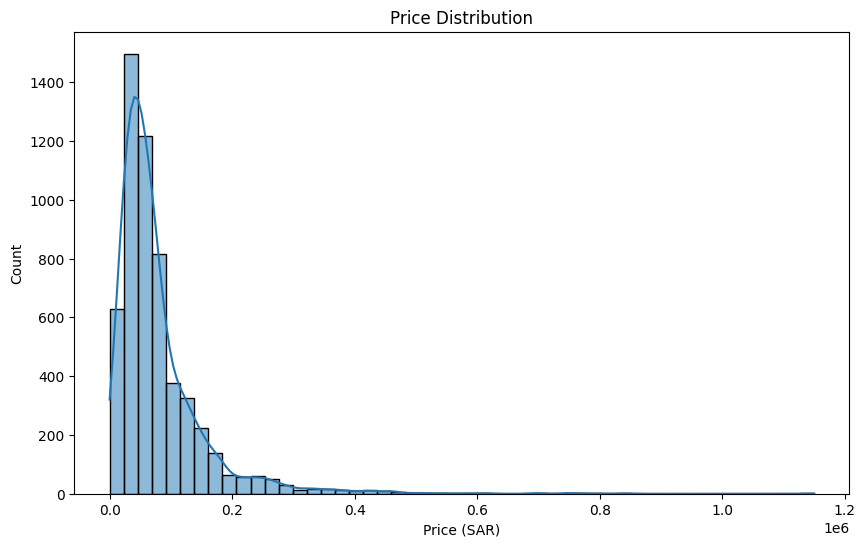

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (SAR)')
plt.show()


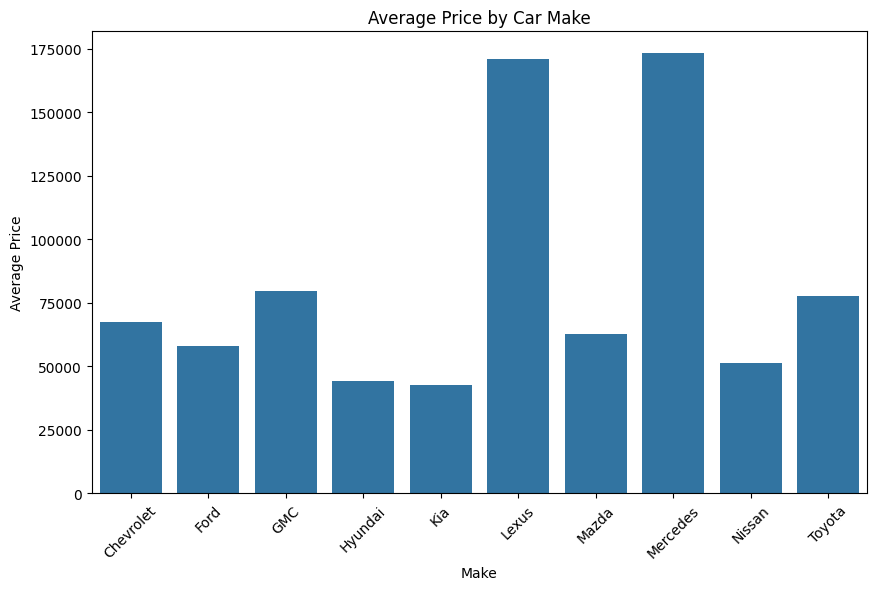

In [ ]:
top_makes = df['Make'].value_counts().nlargest(10).index
avg_price_by_make = df[df['Make'].isin(top_makes)].groupby('Make')['Price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_make.index, y=avg_price_by_make.values)
plt.title('Average Price by Car Make')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.show()


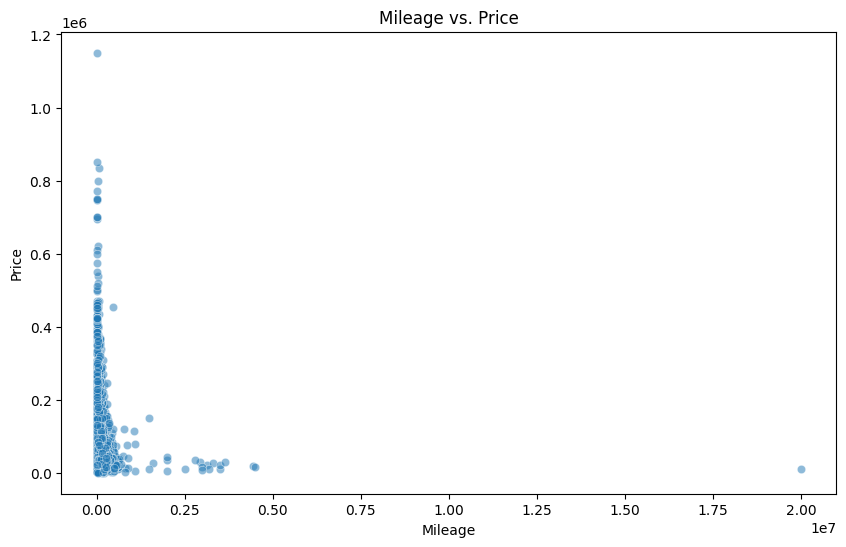

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.5)
plt.title('Mileage vs. Price')
plt.show()

# Feature Engineering

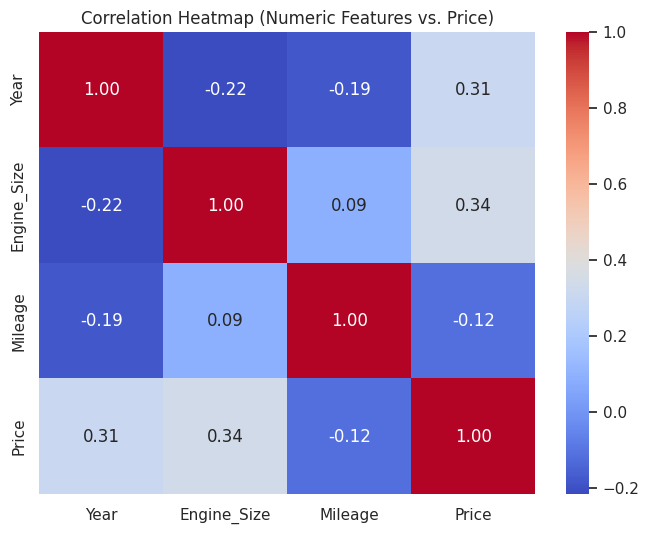

In [ ]:
sns.set(style="whitegrid")

# 1. numeric features with Price
numeric_features_corr = ['Year', 'Engine_Size', 'Mileage', 'Price']
corr = df[numeric_features_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features vs. Price)')
plt.show()

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

numeric_features = ['Year', 'Engine_Size', 'Mileage']
categorical_features = ['Make', 'Type', 'Origin', 'Color', 'Options',
                        'Fuel_Type', 'Gear_Type', 'Condition', 'Region', 'Negotiable']

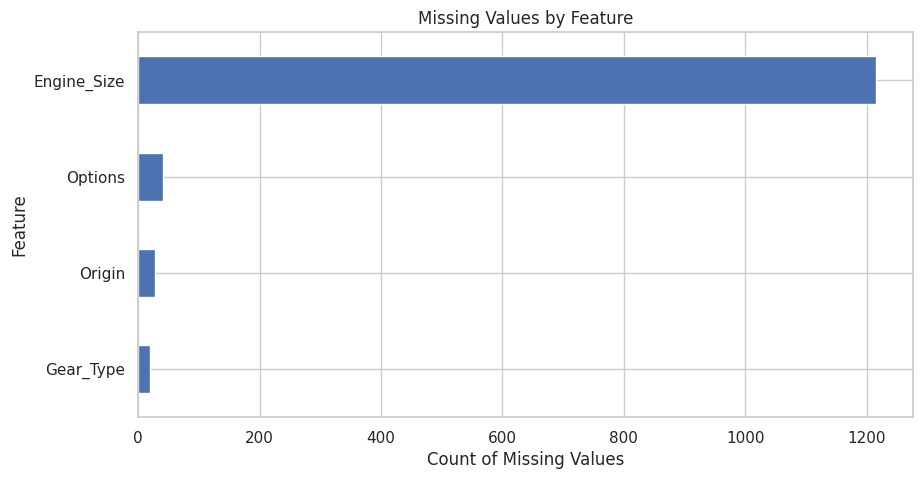

In [ ]:
#Missing values bar plot
missing_counts = df[['Year', 'Engine_Size', 'Mileage', 'Make', 'Type', 'Origin', 'Color',
                     'Options', 'Fuel_Type', 'Gear_Type', 'Condition', 'Region', 'Negotiable']].isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(10, 5))
missing_counts.sort_values().plot(kind='barh')
plt.title('Missing Values by Feature')
plt.xlabel('Count of Missing Values')
plt.ylabel('Feature')
plt.show()

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Build Models
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


# Model Training

In [ ]:
# 8. Train Models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 9. Predict & Evaluate
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)



In [ ]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Print Results
print("Linear Regression:")
print(f"  RMSE: {lr_rmse:.2f}")
print(f"  R²: {lr_r2:.2f}")
print("\nRandom Forest:")
print(f"  RMSE: {rf_rmse:.2f}")
print(f"  R²: {rf_r2:.2f}")


Linear Regression:
  RMSE: 45748.50
  R²: 0.63

Random Forest:
  RMSE: 31842.48
  R²: 0.82
